# Logistic Regression 구현

In [1]:
import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]]) 
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]])

W = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(3001):
  W.requires_grad_(True)
  b.requires_grad_(True)

  # 시그모이드 함수 사용
  h = torch.sigmoid(torch.mm(x_train, W) + b)

  # 바이너리 크로스 엔트로피 BCE
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  cost.backward() # 기울기 계산

  with torch.no_grad():
    W = W - lr * W.grad
    b = b - lr * b.grad
    
    if epoch % 100 == 0:
      print(f"W: {W}, b = {b}, cost: {cost}")

W: tensor([[-0.4990]]), b = tensor([[0.1618]]), cost: 0.7653501033782959
W: tensor([[-1.4613]]), b = tensor([[4.4379]]), cost: 0.41957950592041016
W: tensor([[-1.9041]]), b = tensor([[5.7908]]), cost: 0.39852651953697205
W: tensor([[-2.1781]]), b = tensor([[6.6210]]), cost: 0.3907334804534912
W: tensor([[-2.3701]]), b = tensor([[7.1999]]), cost: 0.38696324825286865
W: tensor([[-2.5127]]), b = tensor([[7.6288]]), cost: 0.38489818572998047
W: tensor([[-2.6224]]), b = tensor([[7.9580]]), cost: 0.3836829662322998
W: tensor([[-2.7087]]), b = tensor([[8.2167]]), cost: 0.3829336166381836
W: tensor([[-2.7776]]), b = tensor([[8.4231]]), cost: 0.38245639204978943
W: tensor([[-2.8334]]), b = tensor([[8.5899]]), cost: 0.38214513659477234
W: tensor([[-2.8788]]), b = tensor([[8.7258]]), cost: 0.3819386065006256
W: tensor([[-2.9161]]), b = tensor([[8.8372]]), cost: 0.381799578666687
W: tensor([[-2.9469]]), b = tensor([[8.9292]]), cost: 0.3817049562931061
W: tensor([[-2.9724]]), b = tensor([[9.0053]])

In [2]:
# 학습 결과 확인 (x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?)
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)

print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [4]:
with torch.no_grad():
  x_test = torch.FloatTensor([[4.5],[1.1]])
  test_result = torch.sigmoid(torch.mm(x_test, W) + b)

  print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [5]:
with torch.no_grad():
  x_test = torch.tensor([[4.5], [1.1]], dtype=torch.float)
  h_test = torch.sigmoid(torch.mm(x_test, W) + b)

  h_test[h_test > 0.5] = 1
  h_test[h_test <= 0.5] = 0

  print(h_test)

tensor([[0.],
        [1.]])


# 여러가지 Optimizer 사용해보기

In [13]:
# optimizer는 in-place 연산을 한다
# 최적화

import torch

x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]]) 
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]])

W = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

# 업데이트 할 파라미터 넣어주기 W와 b
optim = torch.optim.SGD([W, b], lr=1.0)

# 여러가지 optimizer 사용해보기
# optim = torch.optim.Adam([W, b], lr=1.0)
# optim = torch.optim.Adadelta([W, b], lr=1.0)
# optim = torch.optim.Adagrad([W, b], lr=1.0)
# optim = torch.optim.RMSprop([W, b])

for epoch in range(3001):

  h = torch.sigmoid(torch.mm(x_train, W) + b)
  cost = torch.mean(-y_train * torch.log(h) - (1 - y_train) * torch.log(1 - h))

  # zero_grad 가 하는 것
  # with torch.no_grad():
  #   W = torch.FloatTensor([[0]])
  #   b = torch.FloatTensor([[0]])


  optim.zero_grad() # W, b 의 기울기 값 초기화
  cost.backward() # 기울기 계산
  optim.step() # W, b 갱신

  with torch.no_grad():
    if epoch % 100 == 0:
      print(f"W: {W.item()}, b = {b.item()}, cost: {cost}")


W: 0.09126031398773193, b = 0.21060216426849365, cost: 1.4707950353622437
W: -1.4545557498931885, b = 4.417044162750244, cost: 0.4200105667114258
W: -1.9002681970596313, b = 5.77932596206665, cost: 0.39865779876708984
W: -2.1755547523498535, b = 6.613277435302734, cost: 0.39079201221466064
W: -2.3682236671447754, b = 7.194293975830078, cost: 0.38699379563331604
W: -2.511303663253784, b = 7.624566078186035, cost: 0.3849157989025116
W: -2.621307373046875, b = 7.954748630523682, cost: 0.3836936056613922
W: -2.7078166007995605, b = 8.21406078338623, cost: 0.38294029235839844
W: -2.7769341468811035, b = 8.421032905578613, cost: 0.38246071338653564
W: -2.8327951431274414, b = 8.588181495666504, cost: 0.3821479380130768
W: -2.8783364295959473, b = 8.72436809539795, cost: 0.38194045424461365
W: -2.915714979171753, b = 8.836092948913574, cost: 0.3818008601665497
W: -2.9465534687042236, b = 8.928234100341797, cost: 0.38170579075813293
W: -2.972104549407959, b = 9.00455379486084, cost: 0.38164070

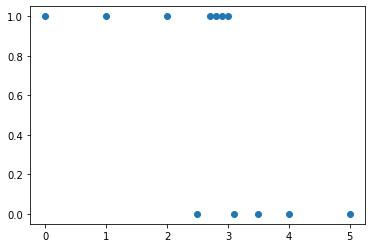

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train)
plt.show()

In [16]:
x_tmp = torch.linspace(0, 5, 100)
print(x_tmp)

tensor([0.0000, 0.0505, 0.1010, 0.1515, 0.2020, 0.2525, 0.3030, 0.3535, 0.4040,
        0.4545, 0.5051, 0.5556, 0.6061, 0.6566, 0.7071, 0.7576, 0.8081, 0.8586,
        0.9091, 0.9596, 1.0101, 1.0606, 1.1111, 1.1616, 1.2121, 1.2626, 1.3131,
        1.3636, 1.4141, 1.4646, 1.5152, 1.5657, 1.6162, 1.6667, 1.7172, 1.7677,
        1.8182, 1.8687, 1.9192, 1.9697, 2.0202, 2.0707, 2.1212, 2.1717, 2.2222,
        2.2727, 2.3232, 2.3737, 2.4242, 2.4747, 2.5253, 2.5758, 2.6263, 2.6768,
        2.7273, 2.7778, 2.8283, 2.8788, 2.9293, 2.9798, 3.0303, 3.0808, 3.1313,
        3.1818, 3.2323, 3.2828, 3.3333, 3.3838, 3.4343, 3.4848, 3.5354, 3.5859,
        3.6364, 3.6869, 3.7374, 3.7879, 3.8384, 3.8889, 3.9394, 3.9899, 4.0404,
        4.0909, 4.1414, 4.1919, 4.2424, 4.2929, 4.3434, 4.3939, 4.4444, 4.4949,
        4.5455, 4.5960, 4.6465, 4.6970, 4.7475, 4.7980, 4.8485, 4.8990, 4.9495,
        5.0000])


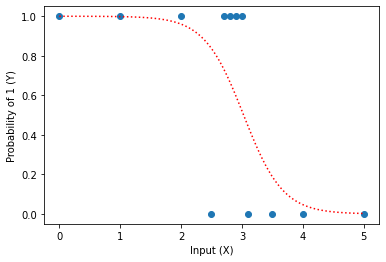

In [17]:
# 다양한 사용법 : https://matplotlib.org/stable/tutorials/introductory/pyplot.html
import matplotlib.pyplot as plt

with torch.no_grad():
  plt.scatter(x_train, y_train)

  # 임의로 x 데이터 만들기, linspace-> 0부터 5까지 100으로 쪼개서 만들어라
  x_tmp = torch.linspace(0, 5, 100).unsqueeze(1)
  y_tmp = torch.sigmoid(torch.mm(x_tmp, W) + b)
  # print(x_tmp)
  # print(y_tmp)

  # label 달기
  plt.ylabel("Probability of 1 (Y)")
  plt.xlabel("Input (X)")
  
  plt.plot(x_tmp, y_tmp, ':r')
  plt.show()


# sklearn에서 Logistic Regression 사용
 

In [18]:
from sklearn.linear_model import LogisticRegression

x_train = [[1], [2], [3], [4], [5], [2.5], [3.5], [0], [3.1], [2.7], [2.8], [2.9]]
y_train = [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1] # 입력 shape이 pytorch에서와 다름에 주의!

# penalty 는 너무 큰 값이나 너무 작은 값에 주는건데 그거 안하겠다는 것
model = LogisticRegression(penalty='none') # penalty (or regularization)은 추후 설명, reqularization을 안하겠다
model.fit(x_train, y_train) #W와 b에 해당하는 값 출력 

# 학습이 잘 되었는지 확인
print(model.coef_, model.intercept_)

# 새로운 x값이 주어질 때 y값 예측해보기 
y = model.predict([[4.5],[1.1]]) 
print(y)

[[-3.10385806]] [9.39776831]
[0 1]
